In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('../../01_data/Normativa_SQL.db')

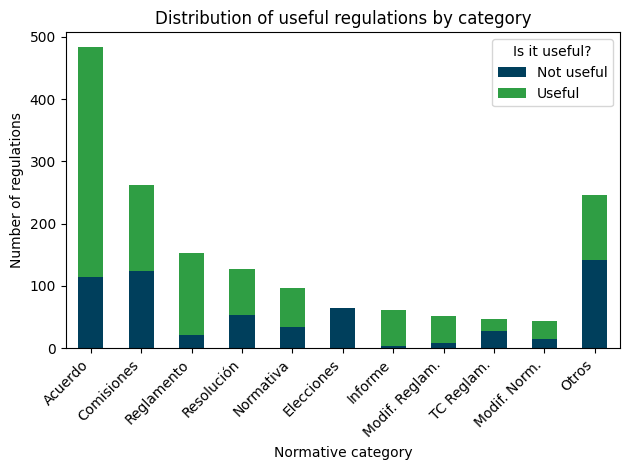

In [21]:
# Leer datos
normativas = pd.read_sql_query("SELECT IdNormativa, TipoNormativa FROM tblNormativa", conn)
utiles = pd.read_sql_query("SELECT IdNormativa FROM tblActuales", conn)

# Cerrar la conexión
conn.close()

# Marcar si cada normativa es útil (0 = no útil, 1 = útil)
normativas['util'] = normativas['IdNormativa'].isin(utiles['IdNormativa']).astype(int)

# Identificar las 10 categorías más frecuentes
top_10 = normativas['TipoNormativa'].value_counts().nlargest(10).index

# Reemplazar las categorías menos frecuentes por "Otros"
normativas['TipoNormativa'] = normativas['TipoNormativa'].apply(
    lambda x: x if x in top_10 else 'Otros'
)

# Agrupar por categoría y utilidad
conteo = normativas.groupby(['TipoNormativa', 'util']).size().unstack(fill_value=0)

# Asegurar orden de categorías: Top 10 + Otros
conteo = conteo.loc[list(top_10) + ['Otros']]

# Asignar colores: 0 = no útil (azul oscuro), 1 = útil (verde)
colores = {0: '#003f5c', 1: '#2f9e44'}  # azul oscuro y verde

# Graficar
conteo.plot(kind='bar', stacked=True, color=[colores[0], colores[1]])
plt.xlabel('Normative category')
plt.ylabel('Number of regulations')
plt.title('Distribution of useful regulations by category')
plt.legend(title='Is it useful?', labels=['Not useful', 'Useful'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()